<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="fig/cover-small.jpg">

*本文摘自 Jake VanderPlas 的 [Python 之旅](http://www.oreilly.com/programming/free/a-whirlwind-tour-of-python.csp)，内容可在 [GitHub](https://github.com/jakevdp/WhirlwindTourOfPython) 上找到。*

*文本和代码在 [CC0](https://github.com/jakevdp/WhirlwindTourOfPython/blob/master/LICENSE) 许可下发布；另见配套项目，[Python 数据科学手册](https://github.com/jakevdp/PythonDataScienceHandbook)。*

<!--NAVIGATION-->
< [字符串操作和正则表达式](14-Strings-and-Regular-Expressions.ipynb) | [目录](Index.ipynb) | [进一步学习的资源](16-Further-Resources.ipynb) >

# 数据科学工具预览

如果你想从这里出发，进一步使用 Python 进行科学计算或数据科学，有一些包会让生活变得轻松得多。
本节将介绍并预览其中一些更重要的包，并让你了解它们的设计用途。
如果你使用的是本报告开头建议的 *Anaconda* 或 *Miniconda* 环境，可以通过以下命令安装相关包：
```
$ conda install numpy scipy pandas matplotlib scikit-learn
```
让我们依次简要看看这些包。

## NumPy：数值 Python

NumPy 提供了一种高效存储和操作 Python 中多维密集数组的方法。
NumPy 的重要特性包括：

- 它提供了一个 ``ndarray`` 结构，允许高效存储和操作向量、矩阵以及更高维度的数据集。
- 它为操作这些数据提供了易于阅读且高效的语法，从简单的逐元素算术运算到更复杂的线性代数运算。

在最简单的情况下，NumPy 数组看起来很像 Python 列表。
例如，这里是一个包含 1 到 9 的数字范围的数组（与 Python 内置的 ``range()`` 对比）：

In [39]:
import numpy as np
x = np.arange(1, 10)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

NumPy 的数组不仅提供了高效的数据存储，还提供了对数据的高效逐元素操作。
例如，要对数组中的每个元素求平方，我们可以直接对数组应用 "``**``" 运算符：

In [40]:
x ** 2

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

与之相比，Python 风格的列表推导式用于相同结果要冗长得多：

In [41]:
[val ** 2 for val in range(1, 10)]

[1, 4, 9, 16, 25, 36, 49, 64, 81]

与 Python 列表（限于一维）不同，NumPy 数组可以是多维的。
例如，这里我们将我们的 ``x`` 数组重塑成一个 3x3 的数组：

In [42]:
M = x.reshape((3, 3))
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

二维数组是矩阵的一种表示形式，NumPy 知道如何高效地进行典型的矩阵运算。例如，你可以使用 ``.T`` 计算转置：

In [43]:
M.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

或者使用 ``np.dot`` 进行矩阵-向量乘法：

In [44]:
np.dot(M, [5, 6, 7])

array([ 38,  92, 146])

甚至更复杂的运算，如特征值分解：

In [45]:
np.linalg.eigvals(M)

array([ 1.61168440e+01, -1.11684397e+00, -3.38433605e-16])

这种线性代数运算支撑着现代数据分析的许多领域，特别是在机器学习和数据挖掘领域。

有关 NumPy 的更多信息，请参见 [进一步学习的资源](16-Further-Resources.ipynb)。

## Pandas：带标签的列式数据

Pandas 是一个比 NumPy 更新的包，实际上它是基于 NumPy 构建的。
Pandas 提供了一种带标签的多维数据接口，以 DataFrame 对象的形式呈现，对于 R 语言及相关语言的用户来说会非常熟悉。
Pandas 中的 DataFrame 看起来像这样：

In [46]:
import pandas as pd
df = pd.DataFrame({'label': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'value': [1, 2, 3, 4, 5, 6]})
df

,label,value
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


Pandas 接口允许你按名称选择列：

In [47]:
df['label']

0    A
1    B
2    C
3    A
4    B
5    C
Name: label, dtype: object

对字符串条目应用字符串操作：

In [48]:
df['label'].str.lower()

0    a
1    b
2    c
3    a
4    b
5    c
Name: label, dtype: object

对数值条目应用聚合操作：

In [49]:
df['value'].sum()

21

而且，也许最重要的是，进行高效的数据库风格的连接和分组：

In [50]:
df.groupby('label').sum()

,value
label,
A,5
B,7
C,9


在这里，我们用一行代码就计算了所有具有相同标签的对象的总和，使用 NumPy 和核心 Python 提供的工具来做这件事会更加冗长（而且效率更低）。

有关使用 Pandas 的更多信息，请参见 [进一步学习的资源](16-Further-Resources.ipynb)。

## Matplotlib：MatLab 风格的科学可视化

Matplotlib 目前是 Python 中最受欢迎的科学可视化包。
即使是支持者也承认，它的接口有时过于冗长，但它是一个强大的库，可以创建各种图表。

要使用 Matplotlib，我们可以通过启用笔记本模式（用于 Jupyter 笔记本），然后将包导入为 ``plt``：

In [51]:
# 如果使用 Jupyter 笔记本，请运行此代码
%matplotlib inline

In [52]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # 使图表风格类似于 R 的 ggplot

现在让我们创建一些数据（当然是作为 NumPy 数组）并绘制结果：

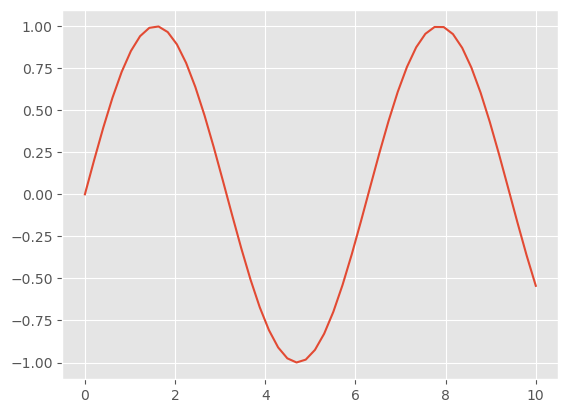

In [53]:
x = np.linspace(0, 10)  # 0 到 10 的值范围
y = np.sin(x)           # 这些值的正弦值
plt.plot(x, y);         # 绘制为线条

如果你实时运行此代码，你将看到一个可以平移、缩放和滚动以探索数据的交互式图表。

这是最简单的 Matplotlib 图表示例；有关可用的广泛图表类型的灵感，请参阅 [Matplotlib 的在线图库](http://matplotlib.org/gallery.html)，以及 [进一步学习的资源](16-Further-Resources.ipynb) 中列出的其他参考资料。

## SciPy：科学 Python

SciPy 是建立在 NumPy 之上的科学功能集合。
这个包最初是一组 Python 对著名 Fortran 数值计算库的包装器，从那时起不断发展。
该包由一系列子模块组成，每个子模块实现某类数值算法。
这里是一些对数据科学更重要的子模块的不完整样本：

- ``scipy.fftpack``：快速傅里叶变换
- ``scipy.integrate``：数值积分
- ``scipy.interpolate``：数值插值
- ``scipy.linalg``：线性代数例程
- ``scipy.optimize``：函数的数值优化
- ``scipy.sparse``：稀疏矩阵存储和线性代数
- ``scipy.stats``：统计分析例程

例如，让我们看看在一些数据之间平滑插值一条曲线。

x: [ 0.          1.42857143  2.85714286  4.28571429  5.71428571  7.14285714
  8.57142857 10.        ]
y: [ 0.          0.98990308  0.2806294  -0.91034694 -0.53870529  0.75762842
  0.75348673 -0.54402111]
Interpolation function: <scipy.interpolate._interpolate.interp1d object at 0x000001C31623C450>
Interpolated y values at x_interp: [0.         0.01479936 0.02947412 0.04402457 0.058451   0.07275371
 0.08693299 0.10098911 0.11492238 0.12873309]


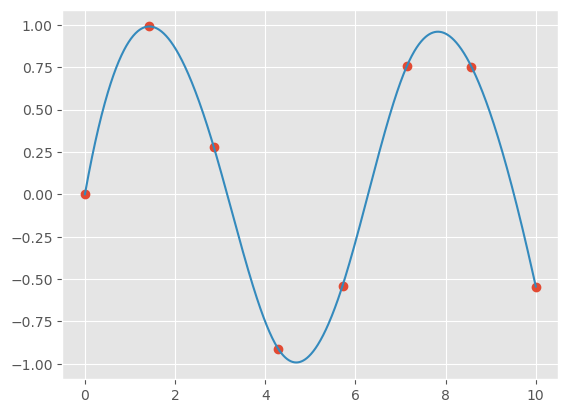

In [54]:
from scipy import interpolate

# 在 0 和 10 之间选择 8 个点
x = np.linspace(0, 10, 8)
y = np.sin(x)

print("x:", x)
print("y:", y)

# 创建一个三次插值函数
func = interpolate.interp1d(x, y, kind='cubic')

print("Interpolation function:", func)

# 在 1,000 个点的网格上插值
x_interp = np.linspace(0, 10, 1000)
y_interp = func(x_interp)

print("Interpolated y values at x_interp:", y_interp[:10])  # 打印前10个插值结果

# 绘制结果
plt.figure()  # 新建图形
plt.plot(x, y, 'o')
plt.plot(x_interp, y_interp);

我们看到的是点之间的平滑插值。

## 其他数据科学包

在这些工具之上，还有许多其他数据科学包，包括通用工具，如 [Scikit-Learn](http://scikit-learn.org) 用于机器学习，[Scikit-Image](http://scikit-image.org) 用于图像分析，以及 [Statsmodels](http://statsmodels.sourceforge.net/) 用于统计建模，以及更特定领域的包，如 [AstroPy](http://astropy.org) 用于天文学和天体物理学，[NiPy](http://nipy.org/) 用于神经成像，等等。

无论你面临的是哪种科学、数值或统计问题，很可能有一个 Python 包可以帮助你解决它。

<!--NAVIGATION-->
< [字符串操作和正则表达式](14-Strings-and-Regular-Expressions.ipynb) | [目录](Index.ipynb) | [进一步学习的资源](16-Further-Resources.ipynb) >